In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.morphology
import statistics as stat
import obr

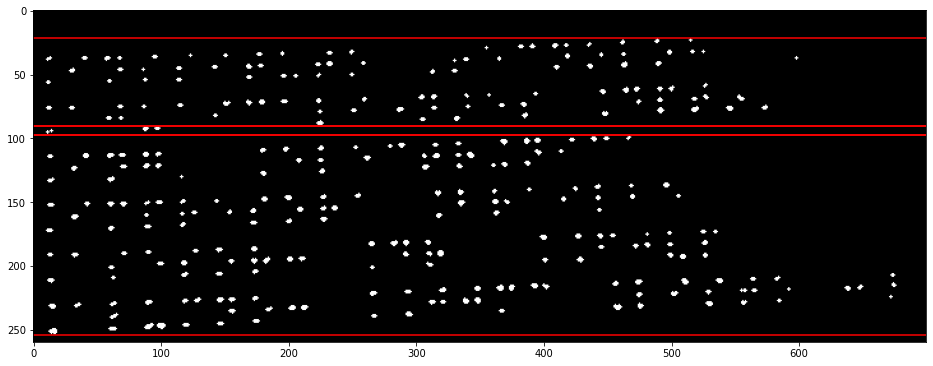

In [4]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagens/braille_inclinado.png", 0)
_ , img_bin = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
img_bin = (~img_bin)/255

# Realizando erosão seguida de dilatação para separar pontos conectados
kernel = skimage.morphology.disk(1)
dst_img = cv2.erode( img_bin, kernel, iterations = 1 )
img_bin = cv2.dilate( dst_img, kernel, iterations = 1 )

hist_y = obr.make_histogram_y(img_bin)
delimiters_y = obr.get_delimiters(hist_y)

plt.figure(figsize=(16,16))
plt.imshow(img_bin, cmap="gray")

for ly in delimiters_y:
    plt.axhline(ly, color='red')

In [5]:
def tilt_correction(img):

    max = 0
    rows, cols = img.shape

    for theta in np.arange(-5, 6, 0.1):
        Mr = cv2.getRotationMatrix2D( (cols/2, rows/2),  theta , 1)
        aux_img = cv2.warpAffine(img, Mr, (cols, rows))

        hist_y = obr.make_histogram_y(aux_img)
        delimiters_y = obr.get_delimiters(hist_y)

        if len(delimiters_y) > max:
            max = len(delimiters_y)
            dst_img = aux_img
    
    return dst_img



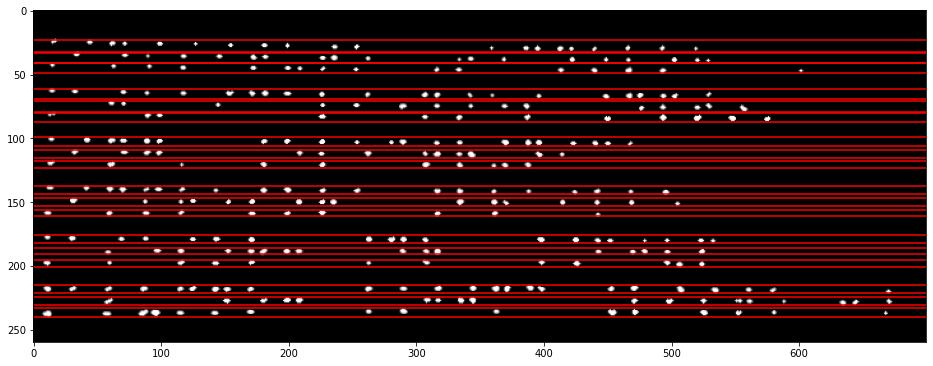

In [20]:
dst_img = tilt_correction(img_bin)

hist_y = obr.make_histogram_y(dst_img)
delimiters_y = obr.get_delimiters(hist_y)

plt.figure(figsize=(16,16))
plt.imshow(dst_img, cmap="gray")

for ly in delimiters_y:
    plt.axhline(ly, color='red')

In [17]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagens/image.tiff",0)
img = img/255

In [18]:
subimages = obr.optical_braille_recognition(img)

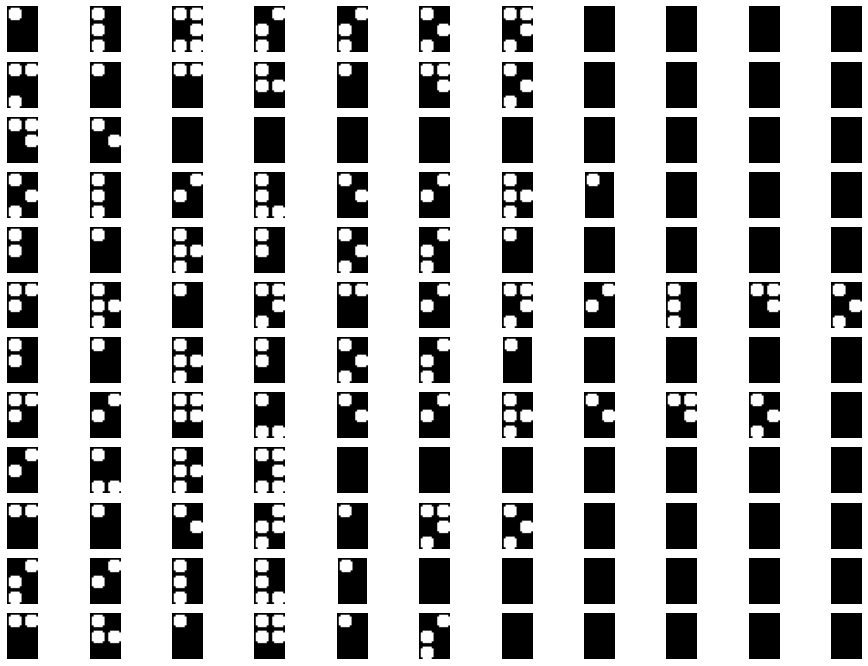

In [19]:
aux = list()
for i in range(len(subimages)):
    aux.append(len(subimages[i]))
max = np.max(aux)

fig, axs = plt.subplots(nrows=len(subimages), ncols=max, figsize=(16,12))

for i in range(len(subimages)):
    for j in range(max):
      if j < len(subimages[i]):
          axs[i][j].imshow(subimages[i][j], cmap='gray')
      else:
          axs[i][j].imshow(np.zeros(subimages[0][0].shape), cmap='gray')
      axs[i][j].axis('off')